# Report
## Makes the `fgwas` visualizations

PPA: Posterior Probability Association

### Load inputs and libraries

In [9]:
fgwas_output = '/data/analysis/UKBB/result/DeepBind.bfs.gz'
gwas = '/data/analysis/UKBB/processed/I10.gwas.imputed_v3.both_sexes.finemapping.tsv.gz'
chr = 12
chrs = int(str(chr).replace('chr', ''))


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fgwas=pd.read_csv(fgwas_output, sep=' ')
region = pd.read_csv(gwas, compression='gzip', sep=' ')

### Plot the distribution of PPA

In [12]:
def PPAHist(chrs):
    x = fgwas.loc[(fgwas['chr']==chrs), "PPA"]
    print('max PPA', max(x))
    n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)
    plt.hist(x, bins=bins)
    plt.xlabel('PPA')
    plt.ylabel('count')
    plt.title('Histogram of PPA of fine-mapping region #' + str(chrs))
    plt.grid(True)
    plt.show()

max PPA 0.0323424


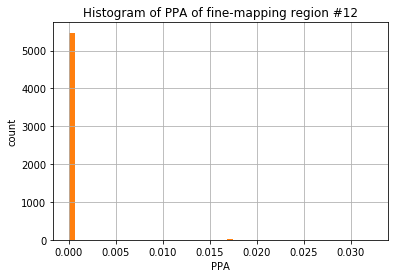

In [13]:
PPAHist(chrs)

### Merge the GWAS pvalue with the finemapping.

In [41]:
table = pd.merge(region, fgwas, left_on = 'variant', right_on = 'id')

In [61]:
print("best fine-mappinig result:")
indices = table.groupby('chunk')['PPA'].idxmax
table.loc[indices]

best fine-mappinig result:


,chr_x,pos_x,ref,alt,index,variant,minor_allele,minor_AF,expected_case_minor_AC,low_confidence_variant,...,chr_y,pos_y,logBF,Z,V,pi,pseudologPO,pseudoPPA,PPA,chunk
2938,12,82556397,T,C,9710012,12:82556397:T:C,C,0.418221,723.523,False,...,12,82556397,9.69057,4.96064,0.002617,-8.61939,1.07136,0.744856,0.032342,0


### GWAS result.

In [60]:
print("best GWAS result:")
indices = table.groupby('SEGNUMBER')['pval'].idxmin
table.loc[indices]

best GWAS result:


,chr_x,pos_x,ref,alt,index,variant,minor_allele,minor_AF,expected_case_minor_AC,low_confidence_variant,...,chr_y,pos_y,logBF,Z,V,pi,pseudologPO,pseudoPPA,PPA,chunk
2938,12,82556397,T,C,9710012,12:82556397:T:C,C,0.418221,723.523,False,...,12,82556397,9.69057,4.96064,0.002617,-8.61939,1.07136,0.744856,0.032342,0


In [58]:
def plotRegion(sub):
    data1 = -np.log10(sub["pval"])
    data2 = sub["PPA"]
    pos = sub["pos_x"]

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Position')
    ax1.set_ylabel('-log10(pval)', color=color)
    ax1.scatter(pos, data1, color=color,  label='-log10(pvalue)')
    ax1.tick_params(axis='y', labelcolor=color)
    plt.legend(loc=2)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('PPA', color=color)  # we already handled the x-label with ax1
    ax2.scatter(pos, data2, color=color, label='fine-mapping PPA')
    ax2.tick_params(axis='y', labelcolor=color)
    plt.legend(loc=0)
    maxPPA = max(data2)+0.01

    midPos = int(sub.loc[sub['PPA'] == max(data2),'pos_x'])
    ax2.set_ylim(-0.001, maxPPA)
    ax2.set_xlim(midPos-5e5,midPos+5e5)
    fig.tight_layout()  # otherwise 
    plt.show()

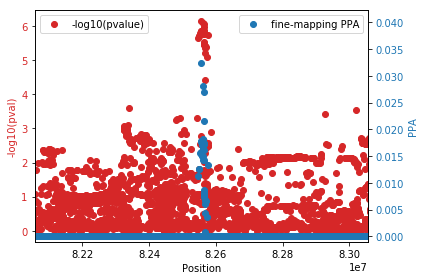

In [59]:
plotRegion(sub)